# TASK 1
## CAR PRICE PREDICTION


This project aims to understand the key factors that influence car prices and develop an accurate predictive model to estimate prices based on vehicle features. With the help of machine learning techniques such as Random Forest and XGBoost, the project explores the relationship between car technical specifications and price, providing deep insights that can help the automotive industry determine better pricing strategies.


In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df=pd.read_csv('car_prediction_dataset/CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns.to_list()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## DATA CLEANING

In [ ]:
# Check missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# Display all duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


In [11]:
df = df.drop_duplicates()

In [12]:
# Removing Outliers

numerical_columns = df.select_dtypes(exclude=['object']).columns

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Hanya menyimpan nilai yang berada di dalam batas untuk kolom tersebut
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply function to remove outliers for all numerical columns
df = remove_outliers(df, numerical_columns)
df_copy = df.copy()


## EDA

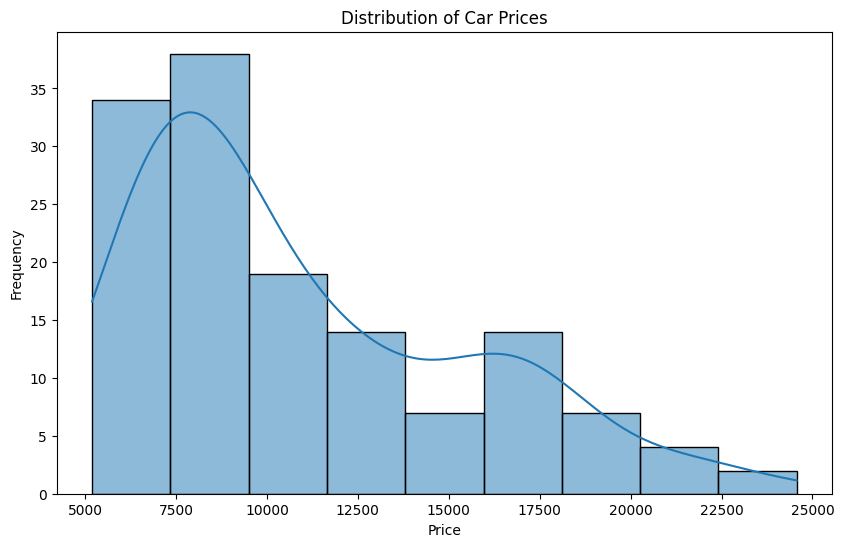

In [ ]:
# Distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


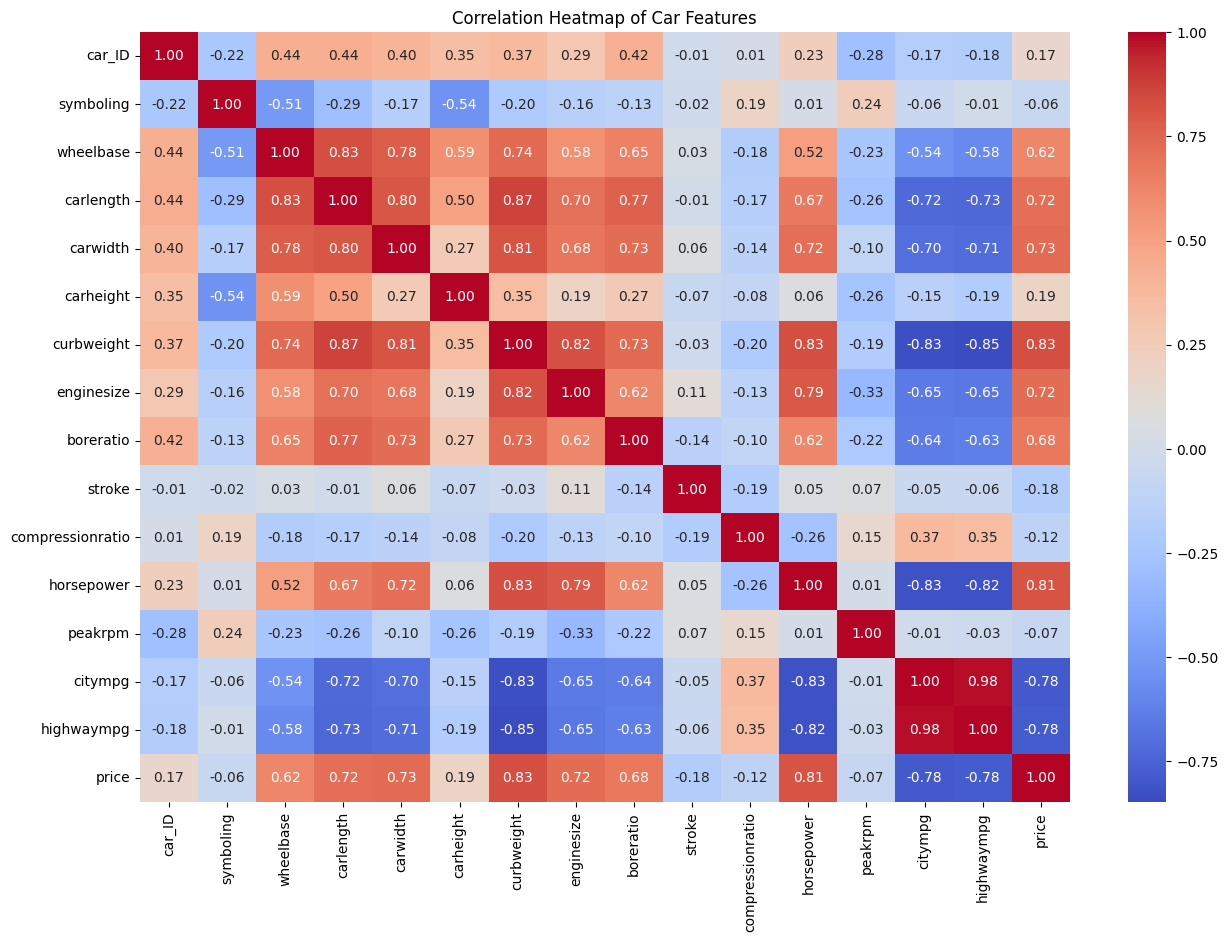

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Car Features")
plt.show()

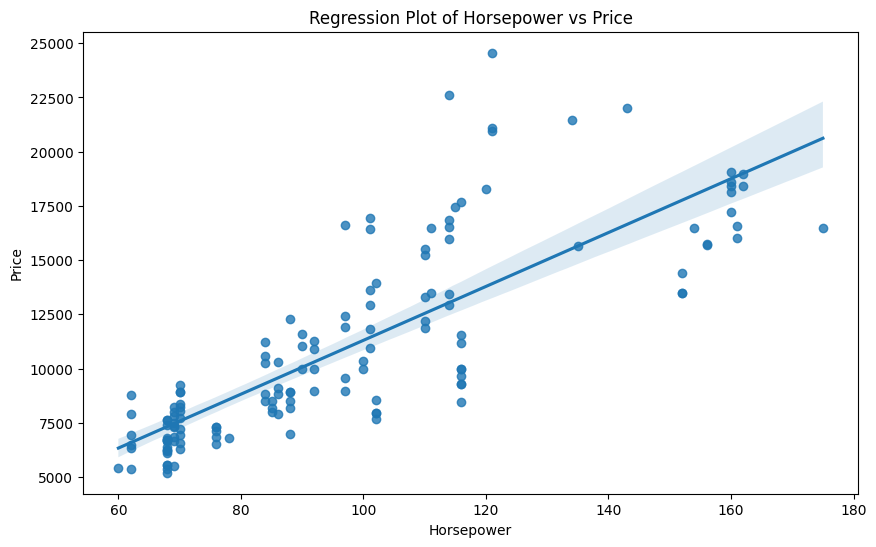

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Regression Plot of Horsepower vs Price')
plt.show()

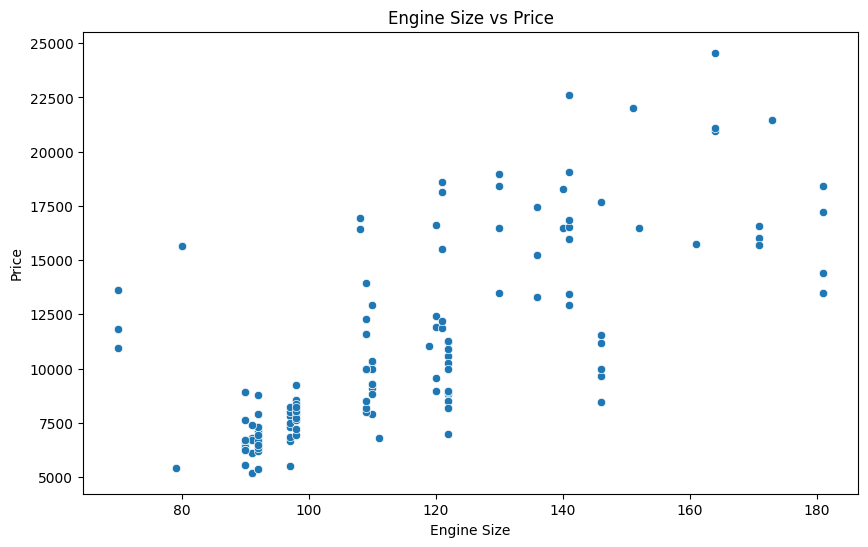

In [ ]:
# Relationship between engine size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='price')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


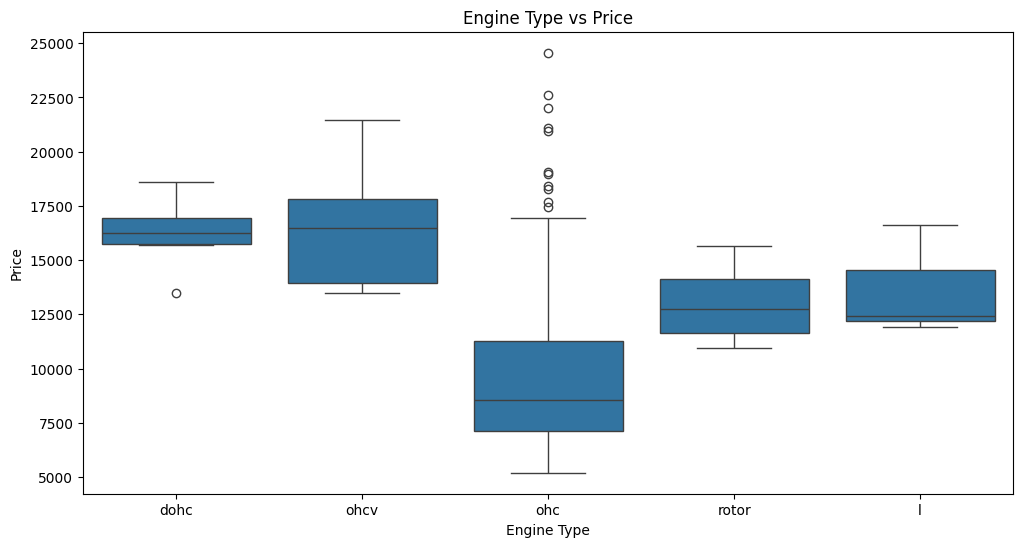

In [ ]:
# Relationship between engine type and price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='enginetype', y='price')
plt.title('Engine Type vs Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

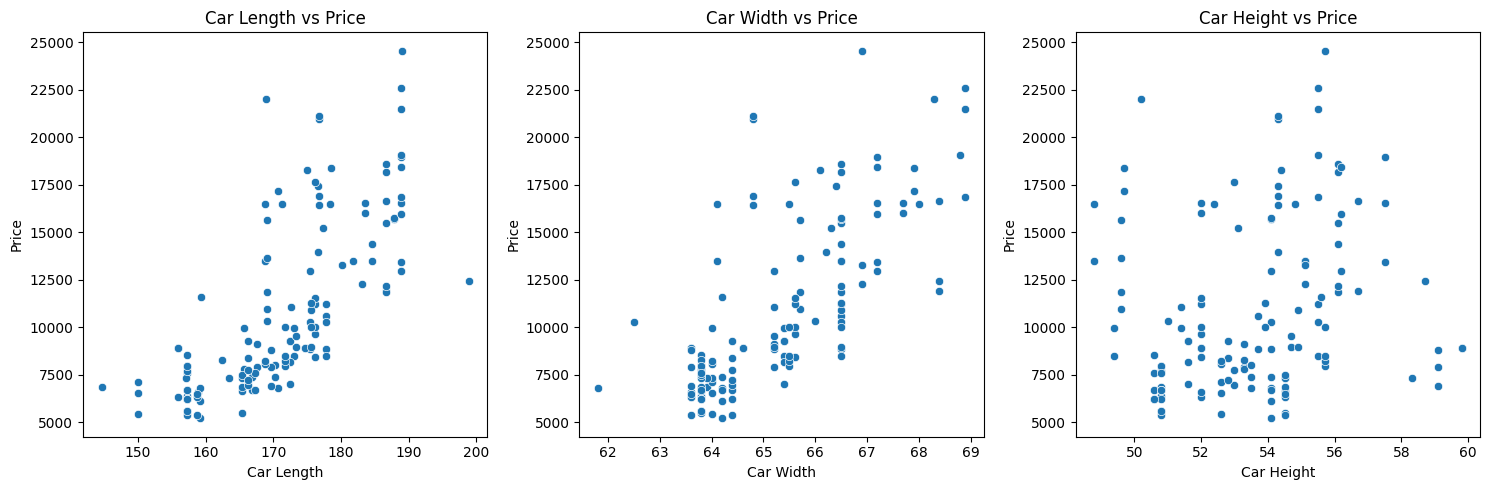

In [ ]:
# Relationship between car dimensions (length, width, height) and price
plt.figure(figsize=(15, 5))

# Car Length vs Price
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='carlength', y='price')
plt.title('Car Length vs Price')
plt.xlabel('Car Length')
plt.ylabel('Price')

# Car Width vs Price
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='carwidth', y='price')
plt.title('Car Width vs Price')
plt.xlabel('Car Width')
plt.ylabel('Price')

# Car Height vs Price
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='carheight', y='price')
plt.title('Car Height vs Price')
plt.xlabel('Car Height')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

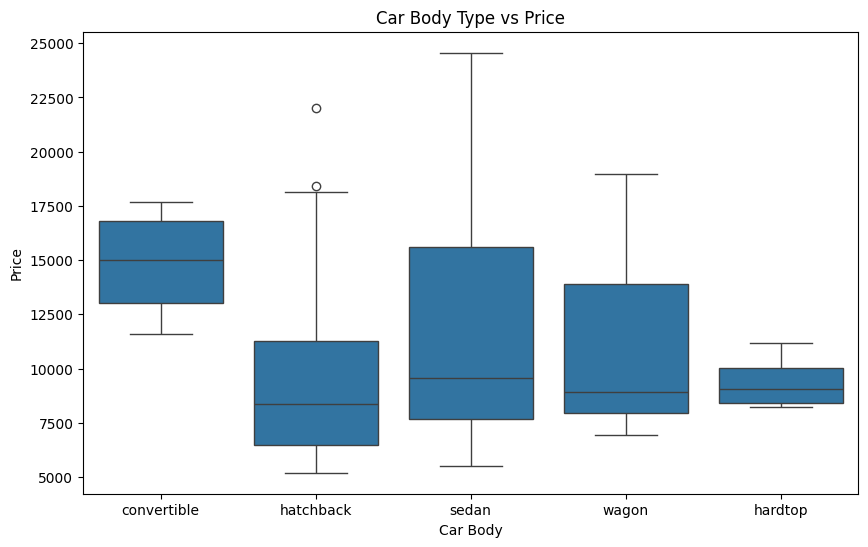

In [ ]:
# Relationship between car body type and price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carbody', y='price')
plt.title('Car Body Type vs Price')
plt.xlabel('Car Body')
plt.ylabel('Price')
plt.show()

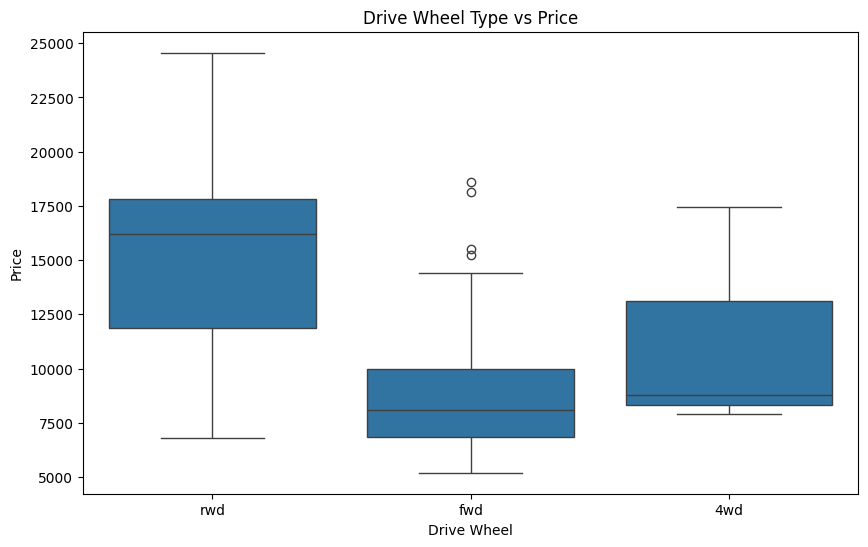

In [ ]:
# Relationship between drive wheel type and price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='drivewheel', y='price')
plt.title('Drive Wheel Type vs Price')
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.show()

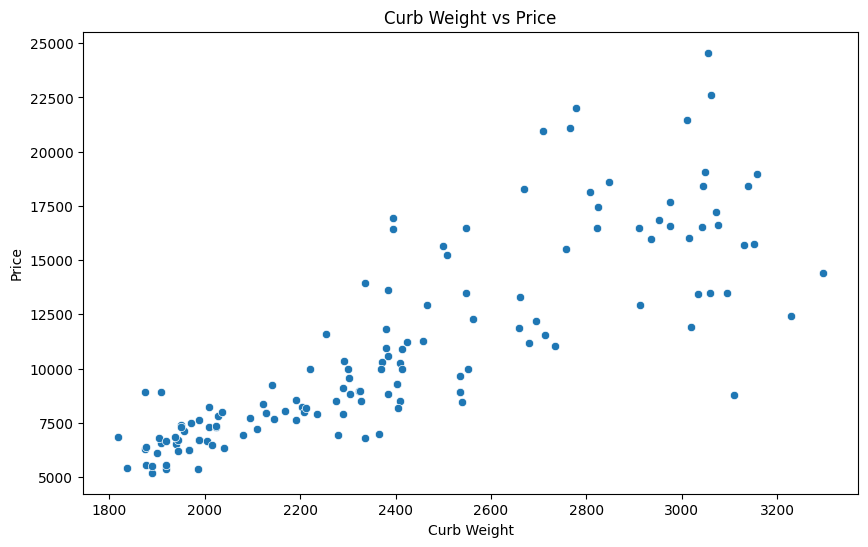

In [ ]:
# Relationship between curb weight and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='curbweight', y='price')
plt.title('Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.show()

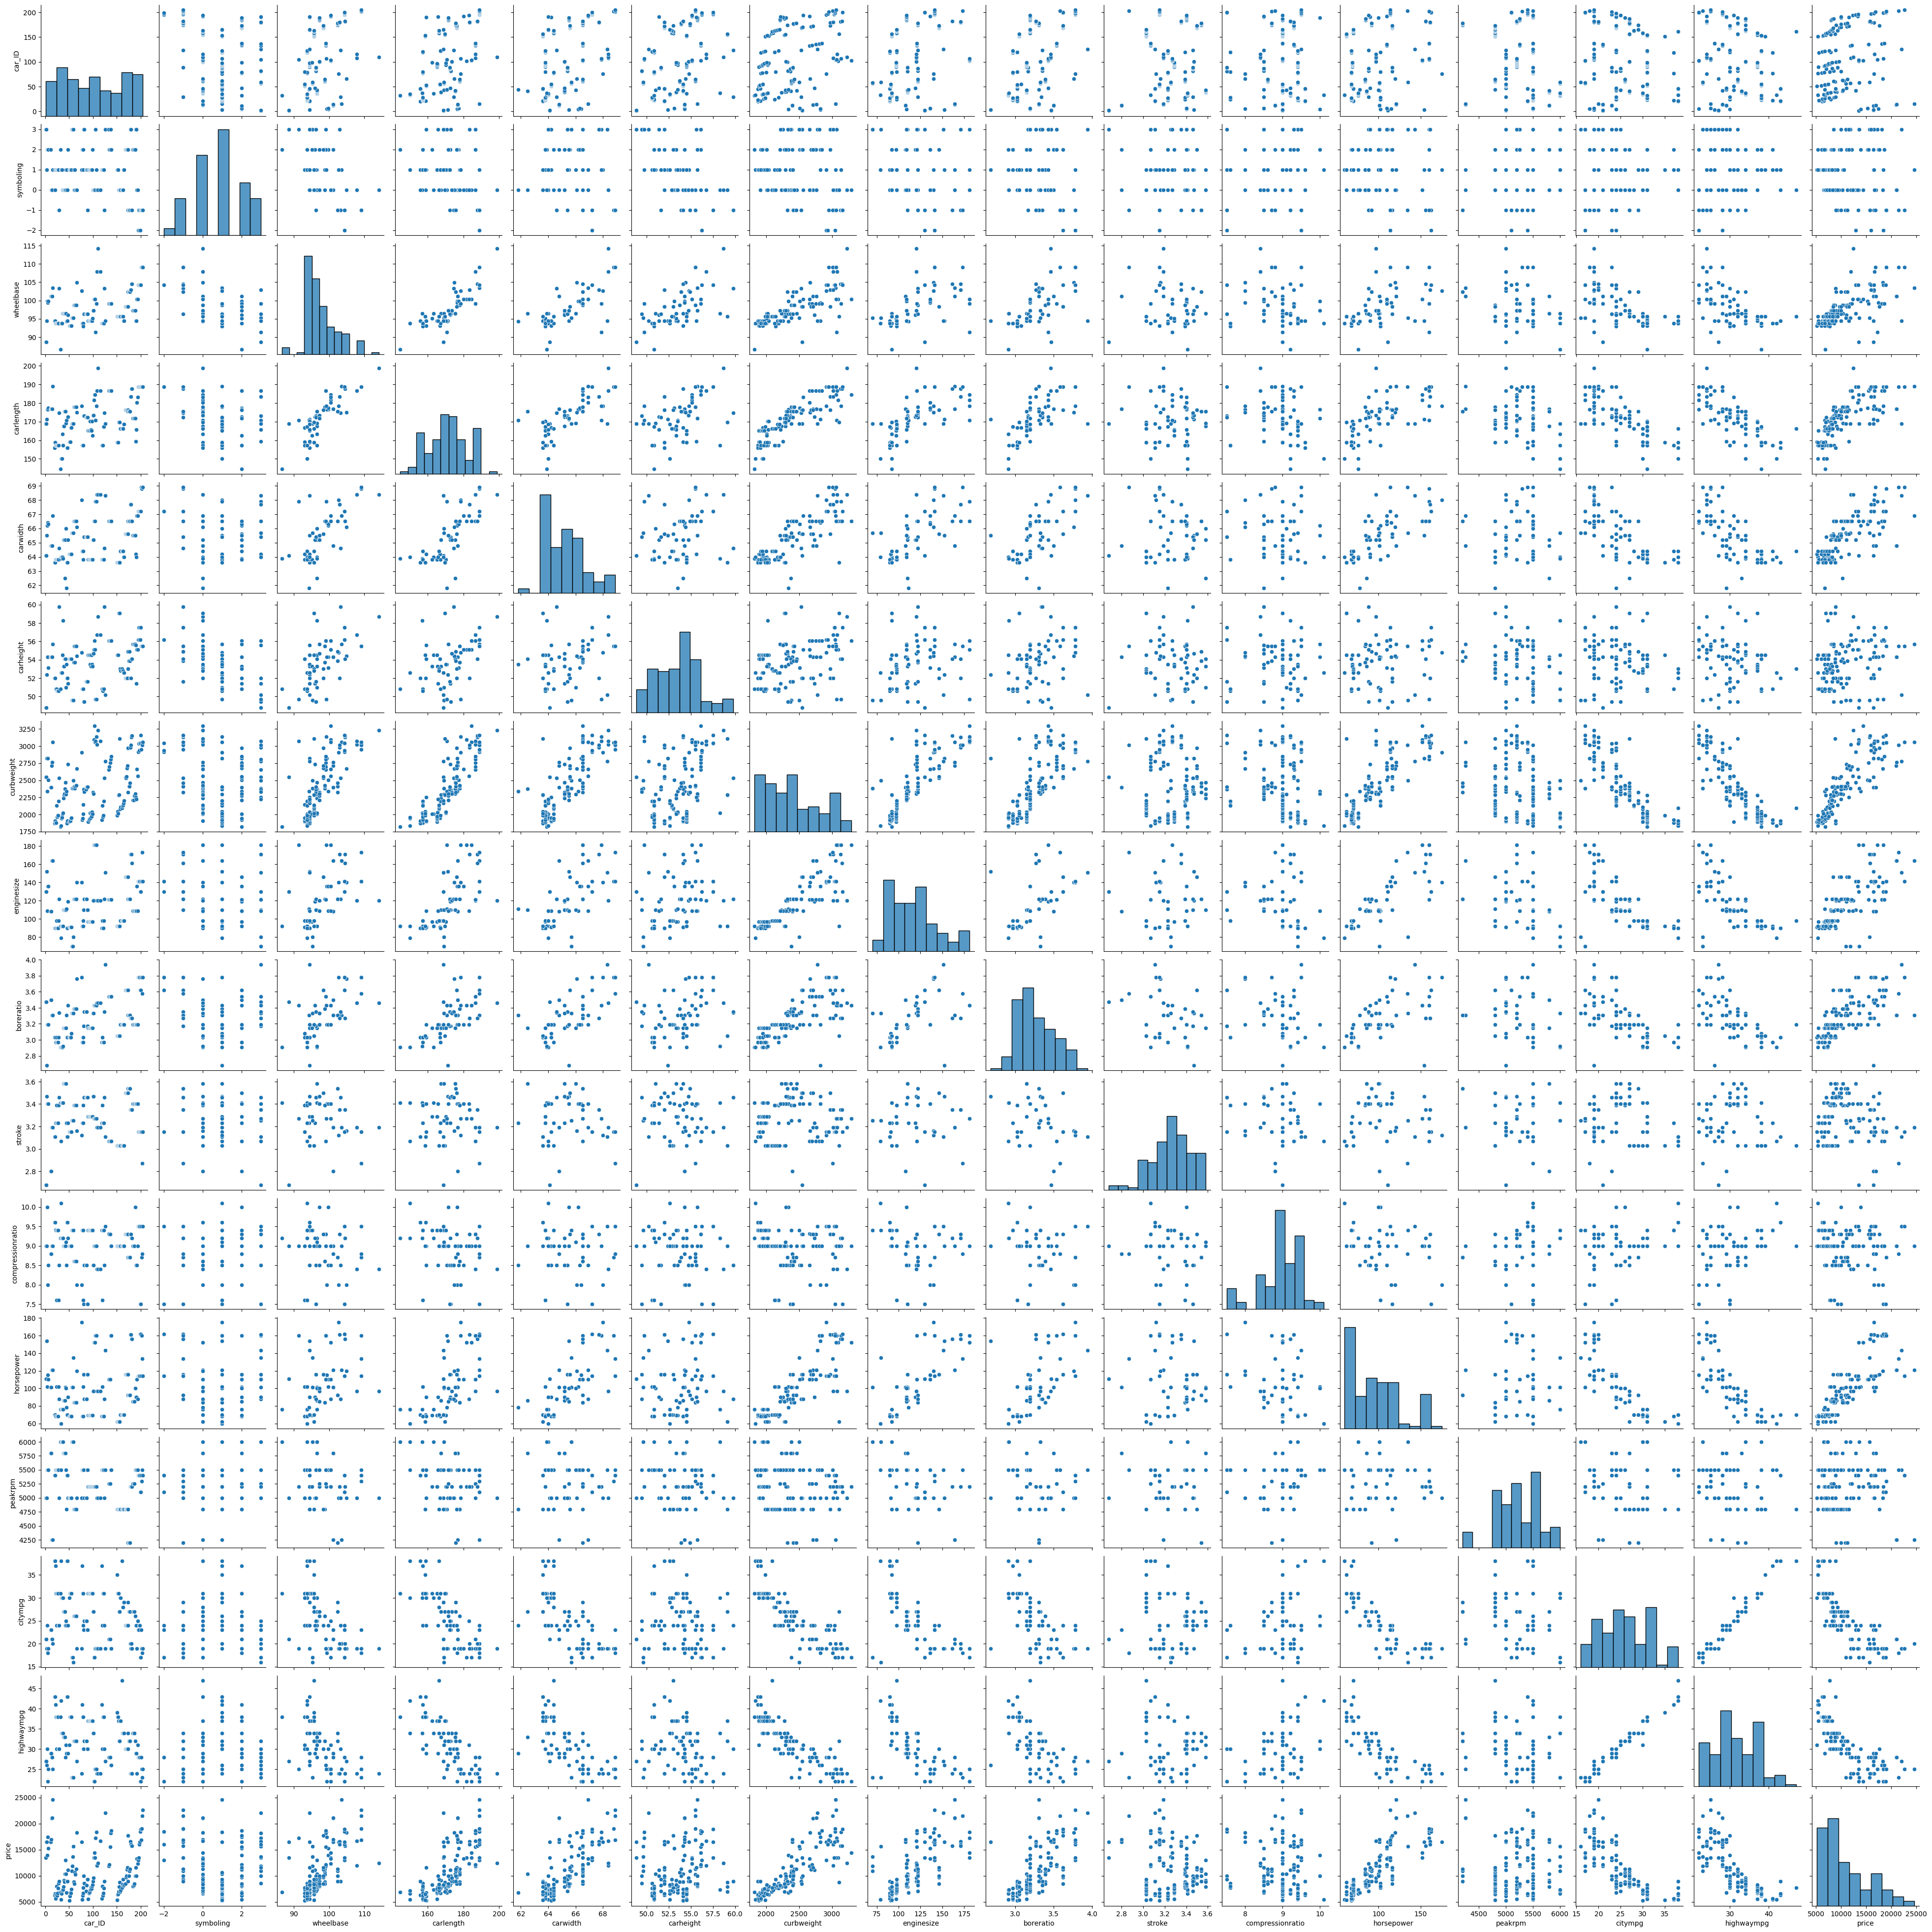

In [ ]:
sns.pairplot(df)

C:\Users\anasafira\AppData\Local\Temp\ipykernel_25288\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

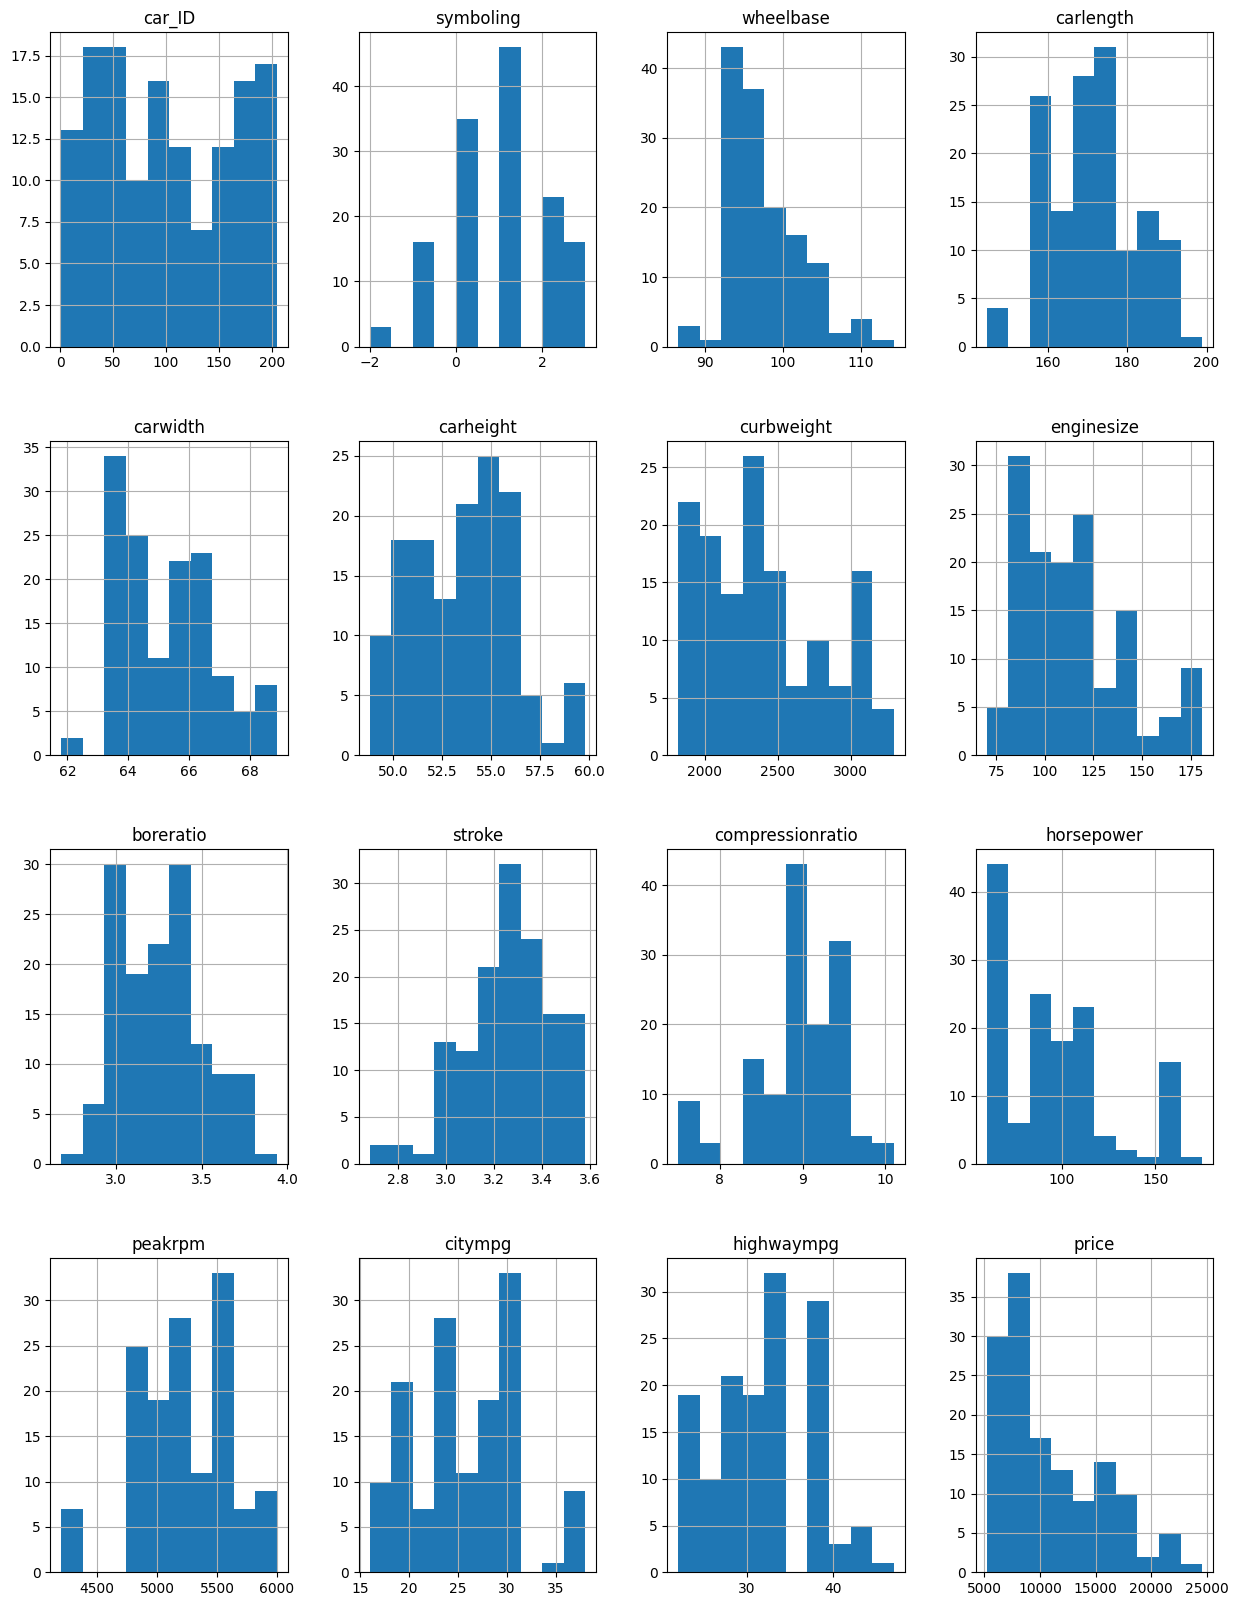

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

## PRE-PROCESSING

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['CarName', 'car_ID'])


In [ ]:
# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

In [ ]:
label_encoders

{'fueltype': LabelEncoder(),
 'aspiration': LabelEncoder(),
 'doornumber': LabelEncoder(),
 'carbody': LabelEncoder(),
 'drivewheel': LabelEncoder(),
 'enginelocation': LabelEncoder(),
 'enginetype': LabelEncoder(),
 'cylindernumber': LabelEncoder(),
 'fuelsystem': LabelEncoder()}

In [ ]:
df.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,1,0,2,0,88.6,168.8,64.1,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,0,2,0,88.6,168.8,64.1,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,2,2,0,94.5,171.2,65.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,3,1,0,99.8,176.6,66.2,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,3,0,0,99.4,176.6,66.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,0,0,1,3,1,0,99.8,177.3,66.3,...,136,3,3.19,3.40,8.5,110,5500,19,25,15250.0
10,2,0,0,1,3,2,0,101.2,176.8,64.8,...,108,3,3.50,2.80,8.8,101,5800,23,29,16430.0
11,0,0,0,0,3,2,0,101.2,176.8,64.8,...,108,3,3.50,2.80,8.8,101,5800,23,29,16925.0
12,0,0,0,1,3,2,0,101.2,176.8,64.8,...,164,3,3.31,3.19,9.0,121,4250,21,28,20970.0
13,0,0,0,0,3,2,0,101.2,176.8,64.8,...,164,3,3.31,3.19,9.0,121,4250,21,28,21105.0


## SPLIT DATA

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,1,0,2,0,88.6,168.8,64.1,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,0,2,0,88.6,168.8,64.1,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,2,2,0,94.5,171.2,65.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,3,1,0,99.8,176.6,66.2,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,3,0,0,99.4,176.6,66.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,0,1,0,4,2,0,104.3,188.8,67.2,...,130,3,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,0,0,0,3,2,0,109.1,188.8,68.9,...,141,3,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,0,1,0,3,2,0,109.1,188.8,68.8,...,141,3,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,0,0,3,2,0,109.1,188.8,68.9,...,173,3,3.58,2.87,8.8,134,5500,18,23,21485.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## MODELLING

### LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)

In [ ]:
# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
import pandas as pd

# Act VS Predict
comparison_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
comparison_lr['Error'] = comparison_lr['Actual'] - comparison_lr['Predicted']

print(comparison_lr)


      Actual     Predicted        Error
200  16845.0  17550.130863  -705.130863
93    7349.0   7008.075309   340.924691
41   12945.0   8303.074005  4641.925995
179  15998.0  19692.760091 -3694.760091
55   10945.0  12951.555481 -2006.555481
20    6575.0   5850.862988   724.137012
65   18280.0  15738.406351  2541.593649
95    7799.0   6757.821552  1041.178448
190   9980.0   7929.301078  2050.698922
78    6669.0   8148.136630 -1479.136630
172  17669.0  12224.780970  5444.219030
195  13415.0  15838.699936 -2423.699936
109  12440.0  17829.267964 -5389.267964
27    8558.0   8713.773980  -155.773980
122   7609.0   7901.003854  -292.003854
96    7499.0   6938.405311   560.594689
19    6295.0   5871.627360   423.372640
37    7895.0   7654.839543   240.160457
199  18950.0  17379.529820  1570.470180
169   9989.0  12459.065426 -2470.065426
46   11048.0  11883.791741  -835.791741
178  16558.0  19088.672618 -2530.672618
106  18399.0  18671.863132  -272.863132
4    17450.0  10878.180489  6571.819511


In [ ]:
# Output evaluation metrics
print("Linear Regression - Mean Absolute Error (MAE):", mae_lr)
print("Linear Regression - Mean Squared Error (MSE):", mse_lr)
print("Linear Regression - Root Mean Squared Error (RMSE):", rmse_lr)
print("Linear Regression - R-squared (R²):", r2_lr)


Linear Regression - Mean Absolute Error (MAE): 1853.367208326723
Linear Regression - Mean Squared Error (MSE): 6511606.713721527
Linear Regression - Root Mean Squared Error (RMSE): 2551.7850053877046
Linear Regression - R-squared (R²): 0.6514287412585789


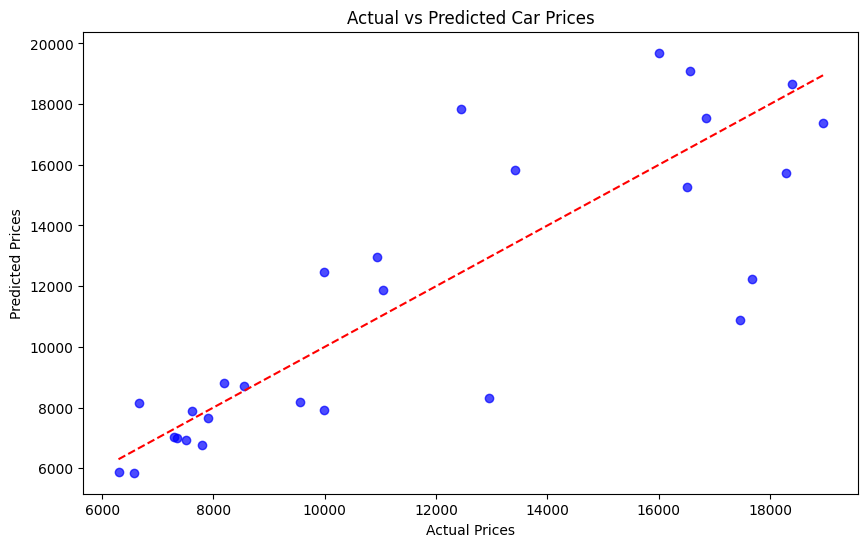

In [ ]:
# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],    
    'max_depth': [10, 15, 20],           
    'min_samples_split': [2, 5, 10]     
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Use the best model from GridSearch results for prediction
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


In [ ]:
import pandas as pd

# Act VS Predict
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_rf['Error'] = comparison_rf['Actual'] - comparison_rf['Predicted']

print(comparison_rf)


      Actual     Predicted        Error
200  16845.0  18775.173167 -1930.173167
93    7349.0   7705.068563  -356.068563
41   12945.0  13704.726389  -759.726389
179  15998.0  16587.196111  -589.196111
55   10945.0  12829.036296 -1884.036296
20    6575.0   8411.753431 -1836.753431
65   18280.0  16855.648328  1424.351672
95    7799.0   7393.360442   405.639558
190   9980.0  11063.301269 -1083.301269
78    6669.0   6590.644688    78.355312
172  17669.0  11029.976667  6639.023333
195  13415.0  15575.221119 -2160.221119
109  12440.0  16942.925397 -4502.925397
27    8558.0   8084.051519   473.948481
122   7609.0   7187.474513   421.525487
96    7499.0   7157.193938   341.806062
19    6295.0   7965.852153 -1670.852153
37    7895.0   8794.313426  -899.313426
199  18950.0  18156.150000   793.850000
169   9989.0   9657.680952   331.319048
46   11048.0  12286.568032 -1238.568032
178  16558.0  16569.526111   -11.526111
106  18399.0  16615.619810  1783.380190
4    17450.0  15050.131794  2399.868206


In [ ]:
# Evaluasi model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest - R-squared (R²):", r2_rf)


Random Forest - Mean Absolute Error (MAE): 1265.8589394540652
Random Forest - Mean Squared Error (MSE): 3578457.412085521
Random Forest - Root Mean Squared Error (RMSE): 1891.681107397735
Random Forest - R-squared (R²): 0.8084424537104251


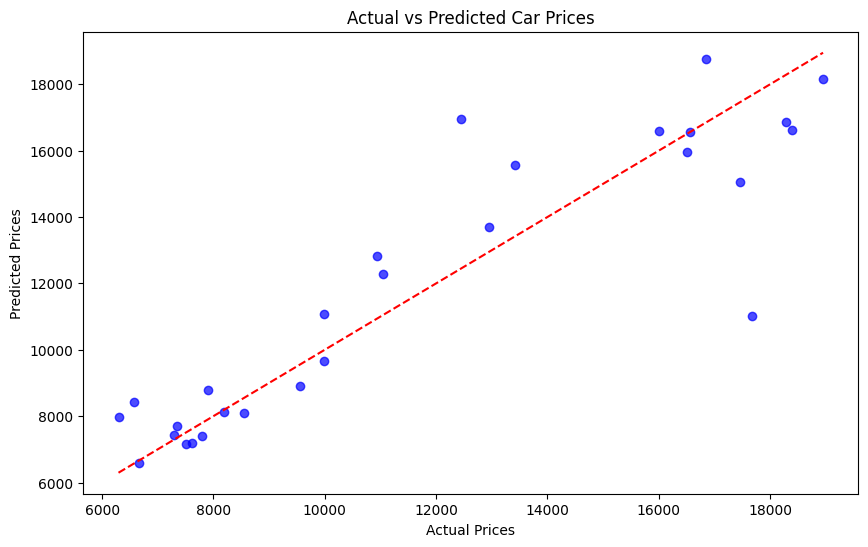

In [ ]:
# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best model from GridSearch results
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

In [ ]:
import pandas as pd

# Act VS Predict
comparison_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
comparison_xgb ['Error'] = comparison_xgb['Actual'] - comparison_xgb['Predicted']

print(comparison_rf)


      Actual     Predicted        Error
200  16845.0  18775.173167 -1930.173167
93    7349.0   7705.068563  -356.068563
41   12945.0  13704.726389  -759.726389
179  15998.0  16587.196111  -589.196111
55   10945.0  12829.036296 -1884.036296
20    6575.0   8411.753431 -1836.753431
65   18280.0  16855.648328  1424.351672
95    7799.0   7393.360442   405.639558
190   9980.0  11063.301269 -1083.301269
78    6669.0   6590.644688    78.355312
172  17669.0  11029.976667  6639.023333
195  13415.0  15575.221119 -2160.221119
109  12440.0  16942.925397 -4502.925397
27    8558.0   8084.051519   473.948481
122   7609.0   7187.474513   421.525487
96    7499.0   7157.193938   341.806062
19    6295.0   7965.852153 -1670.852153
37    7895.0   8794.313426  -899.313426
199  18950.0  18156.150000   793.850000
169   9989.0   9657.680952   331.319048
46   11048.0  12286.568032 -1238.568032
178  16558.0  16569.526111   -11.526111
106  18399.0  16615.619810  1783.380190
4    17450.0  15050.131794  2399.868206


In [ ]:
# Evaluasi model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Mean Absolute Error (MAE):", mae_xgb)
print("XGBoost - Mean Squared Error (MSE):", mse_xgb)
print("XGBoost - Root Mean Squared Error (RMSE):", rmse_xgb)
print("XGBoost - R-squared (R²):", r2_xgb)


XGBoost - Mean Absolute Error (MAE): 1310.6141531808037
XGBoost - Mean Squared Error (MSE): 4358968.210908958
XGBoost - Root Mean Squared Error (RMSE): 2087.814218485198
XGBoost - R-squared (R²): 0.7666611171573661


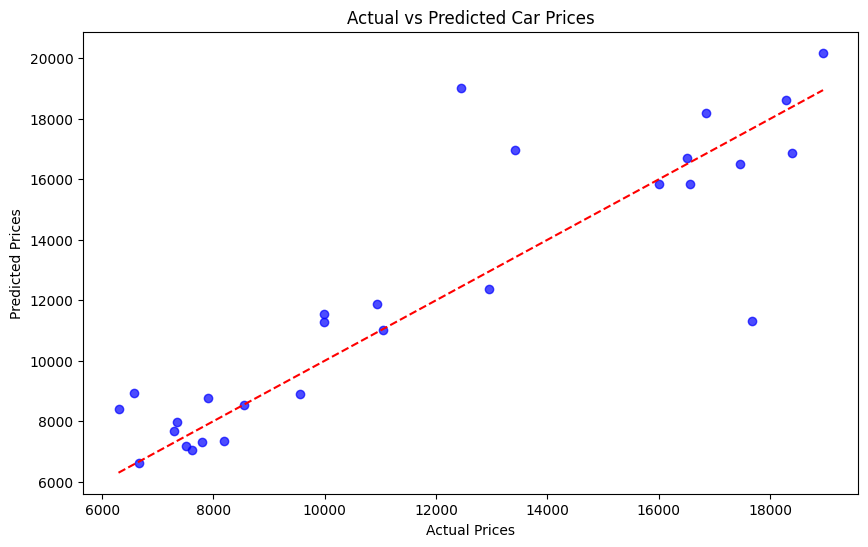

In [ ]:
# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## CONCLUSION

This research analyzed the data in depth to understand the key factors that influence car prices. The first stage involved exploring the data to identify important features such as horsepower, engine size, curb weight and drivewheel type. Findings show that cars with high performance, larger size, and rear-wheel or all-wheel drive systems (RWD or AWD) tend to have higher prices. This understanding formed the basis for the development of the price prediction model.

After cleaning and processing the data, we compared several predictive models to assess their accuracy in estimating car prices. The Linear Regression model was used as a baseline, but it was not good enough to capture the non-linear patterns in the data. Therefore, we tried Random Forest and XGBoost models, which are known to accommodate higher data complexity. The evaluation results show that Random Forest is the most accurate model, with an R-squared value of 0.808. This means that the model can explain about 80% of the variation in car prices in the data.

With robust evaluation results and low error rates, we conclude that the Random Forest model is the best choice for predicting car prices in this dataset. The model successfully captures non-linear patterns and shows accurate performance, making it a reliable tool for those who want to estimate car prices based on technical specifications. The results of this study open up opportunities for the implementation of predictive models in more competitive and data-driven pricing strategies in the automotive industry.